# About the Data

This data was extracted from the 1994 Census bureau database. This dataset contains census data for approximately 48,000 working people over the age of 16, who made over 100 dollars that year, and who are representative of the larger population. For each of these people, the dataset tracks a person's age, employment,education,marital status, race, gender, capital gains and losses along with native country and whether or not the person's income was over 50,000 for that year.

# Research Questions
    . Determine whether a person earns over $50K a year.
    . Which features are the best determinant for a person's income to be over \$50K a year?
    

# Loading and Cleaning the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.utils import resample

%matplotlib inline

In [2]:
df = pd.read_csv('adult_income_census_UCI.csv', header = None)

In [177]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

In [179]:
df.tail(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
48832,61,Private,89686,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,<=50K.
48833,31,Private,440129,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
48834,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K.
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [15]:
df.shape

(48842, 15)

In [33]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In the income column, I see few observations have a period at the ending. lets remove that

In [4]:
df['income'] = df.income.str.strip('.')

I see few columns have '?' as the value. Let's find how many columns have this

In [182]:
for column in df.select_dtypes(['object']):
    print('{0:20} {1:5d}'.format(column,df[df[column].str.contains('\?')].shape[0]))


workclass             2799
education                0
marital_status           0
occupation            2809
relationship             0
race                     0
sex                      0
native_country         857
income                   0


I see here the column 'workclass' has '?' for 2799 rows, 'occupation' has '?' for 2809 rows and 'native_country' has '?' for 857 rows.

In [88]:
df[(df.occupation == '?')].shape[0]

0

looks like the data contains a space after or before the '?'. So strip it first and then go ahead.

In [5]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [184]:
df[(df.occupation == '?')].shape[0]

2809

In [91]:
no_occ = df[df.occupation == '?'].shape[0]
print(no_occ * 100 / df.shape[0])

5.751197739650301


There is about 6% of the data that has unknown occupation. These make up a small portion of the data, and dropping them should not impact the overall analysis.

In [6]:
df = df[df.occupation != '?']

In [186]:
for column in df.select_dtypes(['object']):
    print('{0:20} {1:5d}'.format(column,df[df[column].str.contains('\?')].shape[0]))

workclass                0
education                0
marital_status           0
occupation               0
relationship             0
race                     0
sex                      0
native_country         811
income                   0


After removing the observations with unknown occupation, all the columns are ok now except native country which we will handle later.

In [187]:
df.shape

(46033, 15)

Let's analyse the other categorical columns.

In [94]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [96]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: workclass, dtype: int64

As we see here,the number of employees in the private sector is much more than others. There are also a good number of people employed by various governmnent entities, self-employed, and a small number without pay. 
I will combine the different sub categories into one category as below:

    •	combine Self-emp-not-inc and Self-emp-inc into category 'Self Employment'
    •	Local, State, and Federal Governments into category 'Government'


In [7]:
df.workclass = df.workclass.map({
    'Private' : 'Private',
    'Self-emp-not-inc':'Self_employed',
    'Self-emp-inc':'Self_employed',
    'Local-gov':'Government',
    'State-gov':'Government', 
    'Federal-gov':'Government',
'Without-pay' : 'Without-pay'})

In [119]:
df.workclass.value_counts()

Private          33906
Government        6549
Self_employed     5557
Name: workclass, dtype: int64

In our dataset, we have columns 'education', 'education_num'. 
let's check if the column education number has any relation with the categorical education column.

In [139]:
df_edu = df[['education', 'education_num']].sort_values(by = 'education_num')
df_edu.drop_duplicates()

,education,education_num
21722,Preschool,1
8753,1st-4th,2
44164,5th-6th,3
21133,7th-8th,4
38489,9th,5
13538,10th,6
27669,11th,7
29016,12th,8
19006,HS-grad,9
795,Some-college,10


As we see here , Education number is an ordinal scale representing level of education because it doesn't indicate number of years of schooling. For our analyses, we will drop the education number column and create dummies later assuming we want this as a feature in our models.

In [8]:
df.drop('education_num', axis = 1, inplace = True )

In [141]:
df.education.value_counts()

HS-grad         14972
Some-college    10036
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1631
Assoc-acdm       1529
10th             1239
7th-8th           844
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: education, dtype: int64

Now there are a lot of categories with few categories having less people in them. 
Let's generalize these categories to be the following:   

    •	Middle_School - Till 9th Grade    
    •	High_School - From 10th to HS-grad
    •	Bachelors_Degree - Some-college,'Assoc-voc','Assoc-acdm', 'Bachelors' 
        - people who attended college, and those who earned Associates Degrees or Bachelors Degree
    •	Advanced_Degree    - all people who earned Masters, Professional Degrees, or Doctorates


In [9]:
df.education = df.education.map({'Preschool':'Middle_School',
                                   '1st-4th':'Middle_School',
                                   '5th-6th':'Middle_School',
                                   '7th-8th':'Middle_School',
                                   '9th':'Middle_School',
                                   '10th':'High_School',
                                   '11th':'High_School',
                                   'HS-grad':'High_School',
                                   'Some-college':'Bachelors_Degree',
                                   'Assoc-voc':'Bachelors_Degree',
                                   'Assoc-acdm':'Bachelors_Degree',
                                   'Bachelors':'Bachelors_Degree',
                                   'Masters':'Advanced_Degree',
                                   'Prof-school':'Advanced_Degree',
                                   'Doctorate':'Advanced_Degree'})


df.education.value_counts()

Bachelors_Degree    21315
High_School         17842
Advanced_Degree      3976
Middle_School        2301
Name: education, dtype: int64

In [152]:
df.marital_status.value_counts()

Married-civ-spouse       21451
Never-married            14875
Divorced                  6363
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: marital_status, dtype: int64

In [10]:

df.marital_status = df.marital_status.map({
   'Never-married' : 'Never_married',
    'Married-civ-spouse' : 'Married_living_with_spouse' ,
    'Married-AF-spouse' : 'Married_living_with_spouse',
    'Divorced' : 'Married_living_alone' ,
    'Separated' : 'Married_living_alone' ,
    'Widowed' : 'Married_living_alone',
    'Married-spouse-absent' : 'Married_living_alone'
})


In [158]:
df.marital_status.value_counts()

Married_living_with_spouse    21483
Never_married                 14875
Married_living_alone           9675
Name: marital_status, dtype: int64

In [100]:
df.relationship.value_counts()

Husband           19005
Not-in-family     11916
Own-child          6706
Unmarried          4867
Wife               2139
Other-relative     1400
Name: relationship, dtype: int64

There is already a Marital Status column in the dataset, which can have mapping with relationship column,  I will drop this column from the data set.

In [11]:
df.drop('relationship', axis = 1, inplace = True)

In [101]:
df.race.value_counts()

White                 39444
Black                  4356
Asian-Pac-Islander     1423
Amer-Indian-Eskimo      435
Other                   375
Name: race, dtype: int64

There is a higher number of people who are white than other races. 

In [102]:
df.sex.value_counts()

Male      31114
Female    14919
Name: sex, dtype: int64

In [103]:
df.native_country.value_counts()

United-States                 41292
Mexico                          903
?                               811
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                        

In [207]:
df[df.native_country == 'United-States'].shape

(41292, 13)

I see here the majority of people in this census data are native to the United States. So I can continue with the data only for one country.

In [12]:
df = df[df.native_country == 'United-States']

Let's analyse the continuous variables.

In [209]:
df.age.describe()

count    41292.000000
mean        38.597210
std         13.272337
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

The Average age of people is 38, with minimum age as 17 years and maximum age is 90 years. 
The 25% of people are at or below  28 years

In [210]:
df.fnlwgt.describe()

count    4.129200e+04
mean     1.872429e+05
std      1.050282e+05
min      1.349200e+04
25%      1.157840e+05
50%      1.767250e+05
75%      2.346400e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [211]:
print('Summary of Capital Gains:' )
print(df.capital_gain.describe())
print('\nSummary of Capital Losses:')
print(df.capital_loss.describe())

Summary of Capital Gains:
count    41292.000000
mean      1126.758888
std       7602.228995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

Summary of Capital Losses:
count    41292.000000
mean        90.065291
std        407.794060
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64


The Average value for capital loss and capital gain are low. Looks like many people did not report these values. And there are few outliers also.

In [214]:
df[df.capital_gain == max(df.capital_gain) ]['income'].value_counts()

>50K    215
Name: income, dtype: int64

There are 215 observations with capital_gain as \$99999. And all are with the income of over $50K

In [215]:
df.hours_per_week.describe()

count    41292.000000
mean        40.975903
std         12.079892
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

The average hours per week is just over 40 hours per week. Interestingly, the minimum is 1 hour per week, and the maximum is 99 hours per week. Let's take a look at those two cases.

In [216]:
df[df.hours_per_week == min(df.hours_per_week)]['income'].value_counts()

<=50K    8
>50K     2
Name: income, dtype: int64

The number of people who work 1 hour per week is 10 and all are earning <=50K except 2 people.

In [217]:
df[df.hours_per_week == max(df.hours_per_week)]['income'].value_counts()

<=50K    77
>50K     38
Name: income, dtype: int64

The number of people who work 99 hours per week is 115, out of which 77 people are earning <= 50K while rest are earning >50K

In [218]:
df.income.value_counts()

<=50K    30844
>50K     10448
Name: income, dtype: int64

Finally, let's change our target varible, income, to a binary variable where income less than \$50,000 is 0, and income greater than $50,000 is 1.

In [13]:
df.income = df.income.map({'<=50K':0, '>50K' : 1 })

Now that our data has been cleaned and wrangled, I will perform Exploratory Data Analysis to identify patterns and trends in the data.

# Exploratory Data Analysis

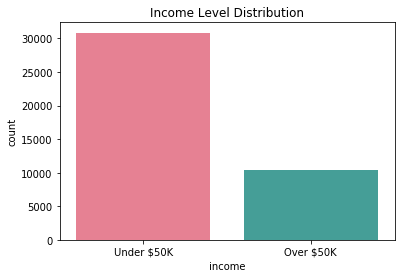

0    75.0
1    25.0
Name: income, dtype: float64


In [328]:
ax= sns.countplot(data = df, x = 'income',palette='husl')
plt.title('Income Level Distribution')
ax.set_xticklabels(['Under $50K', 'Over $50K'])
plt.show()
print(round(df.income.value_counts(normalize = True)  ,2)* 100)

In our dataset, 75% of people have an income below \$50,000, 25% of people earn more than \$50,000

Now Let's start analyzing the bivariate relation between two categorical attribute :

In [107]:
df1 = df.loc[:,['occupation','education','workclass', 'race','sex','marital_status', 'income' ]]
df1.income = df1['income'].map({0 : 'Under $50K', 1: 'Over $50K' })

In [393]:
education_count_pie = df1.education.value_counts(normalize=True).rename('percentage').mul(100).reset_index()

In [394]:
education_counts = (df1.groupby(['income','education']).size() / df1.education.count()).rename('percentage').mul(100).reset_index()
education_counts

,income,education,percentage
0,Over $50K,Advanced_Degree,5.300709
1,Over $50K,Bachelors_Degree,13.992203
2,Over $50K,High_School,6.011719
3,Over $50K,Middle_School,0.213303
4,Under $50K,Advanced_Degree,3.170128
5,Under $50K,Bachelors_Degree,33.885797
6,Under $50K,High_School,34.260916
7,Under $50K,Middle_School,3.165224


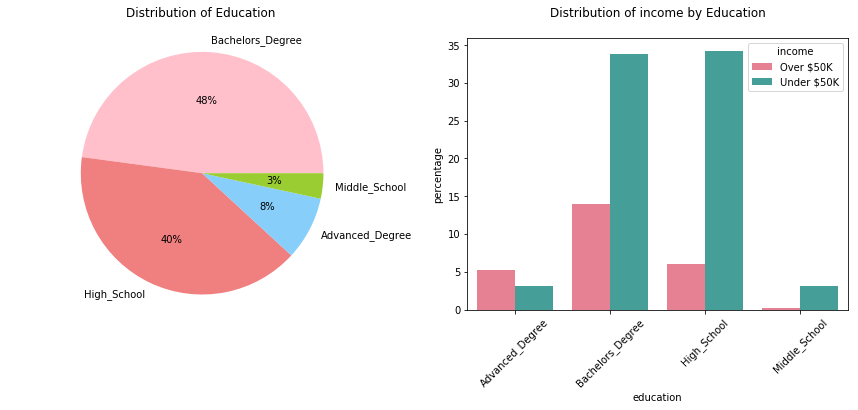

In [395]:
colors = ['pink', 'lightcoral', 'lightskyblue', 'yellowgreen']
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.pie(education_count_pie['percentage'], labels= education_count_pie['index'], autopct='%1.0f%%',colors=colors )
plt.axis('equal')
plt.title("Distribution of Education\n")
plt.subplot(122)
ax = sns.barplot(x="education", y="percentage", hue="income", data=education_counts, palette='husl')  
plt.title('Distribution of income by Education\n')
plt.xticks(rotation=45)
plt.show()


The pie chart shows that we have more people with bachelors degree which is 48% of the total population.
40% of population are high schoolers where as only 8% of people got advanced degree like Masters, Professional Degrees, or Doctorates.

5% of the advanced degree holders earn over \$50K while rest 3% are earning under \$50K.
Around 34% of Bachelor degree holders and high schoolers are earning under \$50K which clearly indicates education is a big factor for higher income.

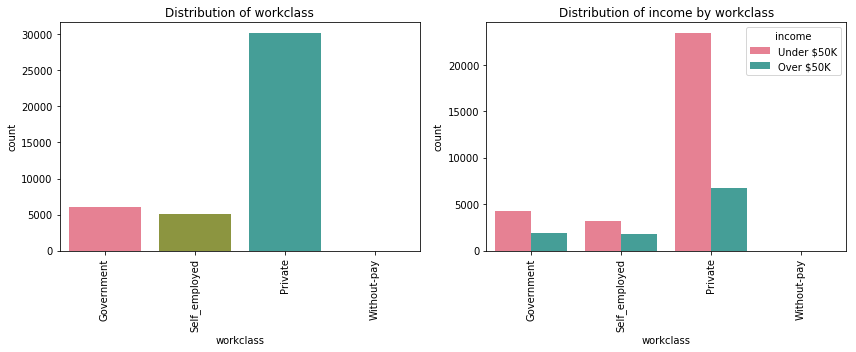

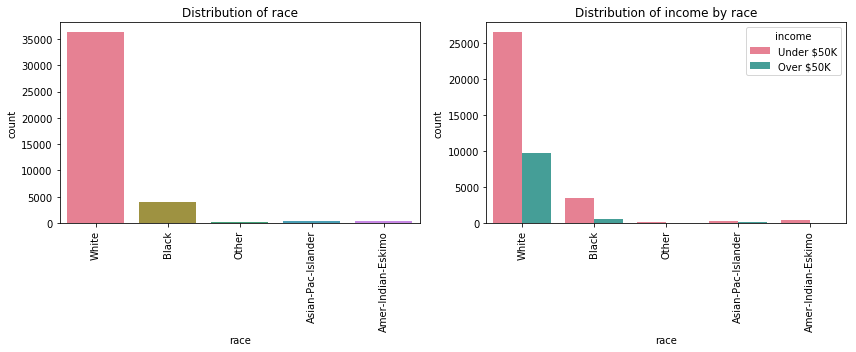

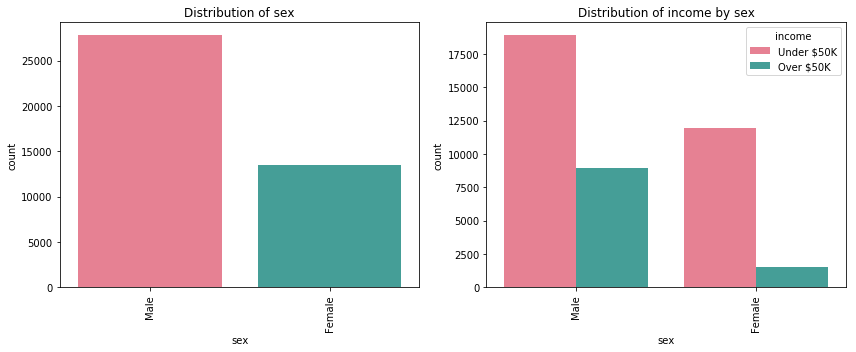

In [19]:
for col in ['workclass', 'race','sex' ] :
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title('Distribution of {}'.format(col))
    plt.xticks(rotation=90)
    sns.countplot(data = df1,  x = col, palette='husl' )
    plt.subplot(122)
    plt.title('Distribution of income by {}'.format(col))
    ax = sns.countplot(data = df1, x = col, hue = 'income' , palette='husl')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

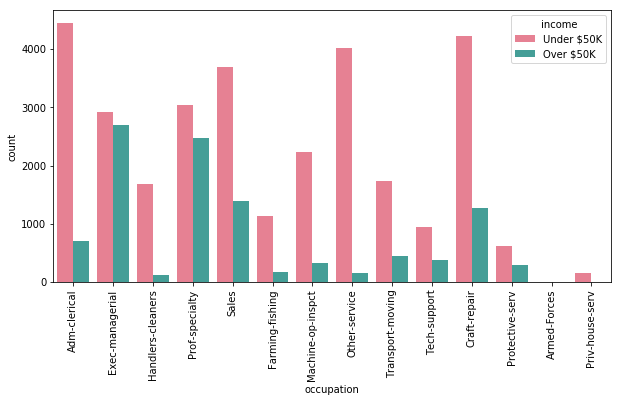

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df1, hue = 'income', x = 'occupation' , palette='husl')
plt.xticks(rotation=90)

plt.show()

In [24]:
marital_status_pie = df1.marital_status.value_counts(normalize=True).rename('percentage').mul(100).reset_index()
marital_status_counts = (df1.groupby('income')['marital_status'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('marital_status')) 

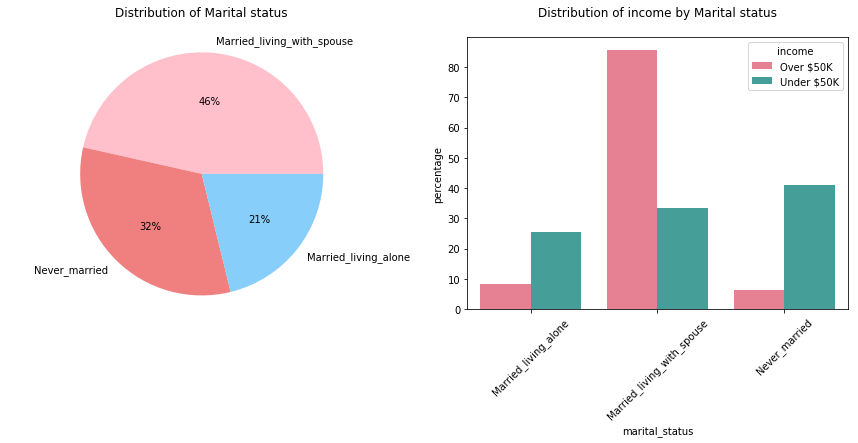

In [25]:
colors = ['pink', 'lightcoral', 'lightskyblue', 'yellowgreen']
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.pie(marital_status_pie['percentage'], labels= marital_status_pie['index'], autopct='%1.0f%%',colors=colors )
plt.axis('equal')
plt.title("Distribution of Marital status\n")
plt.subplot(122)
ax = sns.barplot(x='marital_status', y="percentage", hue="income", data=marital_status_counts, palette='husl')  
plt.title('Distribution of income by Marital status\n')
#ax.set_xticklabels(['Under $50K', 'Over $50K'])
plt.xticks(rotation=45)
plt.show()


We visualize that there are more people who earn less than \$50,000 in the majority of categories including workclass, race, gender, occupation.

But Individuals having advanced degree or being married and living with spouse are earning over \$50,000.

In [51]:
# Initializing data frame to hold p-values from Chi-Square test
p_vals_df = pd.DataFrame(columns=['Feature', 'P_value'])

for col in ['occupation','education','workclass','race','sex','marital_status']:
    counttable = pd.crosstab(df[col], df.income)
    chisq , p_val = stats.chisquare(counttable, axis=None)
    p_vals_df = p_vals_df.append({'Feature':col, 'P_value':float(p_val)}, ignore_index=True)

# Printing p-values of Chi-squared tests, sorted by p-values
p_vals_df.sort_values('P_value')

,Feature,P_value
0,occupation,0.0
1,education,0.0
2,workclass,0.0
3,race,0.0
4,sex,0.0
5,marital_status,0.0


According to the p-values from the chi-squared tests, all categorical values have significant differences (p-value < 0.05) between populations earning over \$50K and under \$50K incomes. This means that all of these demographic attributes have some relationship with income level. So we will consider all these attributes as potential features in our modeling.

Now start analyzing bivariate relation between a continuous and a categorical attribute :

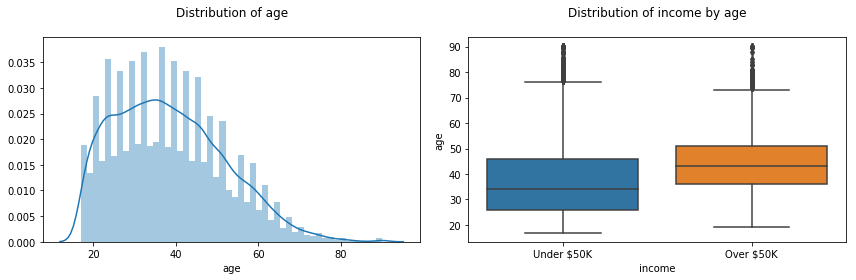

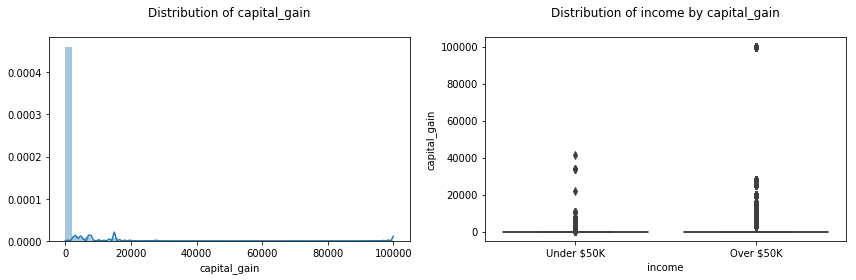

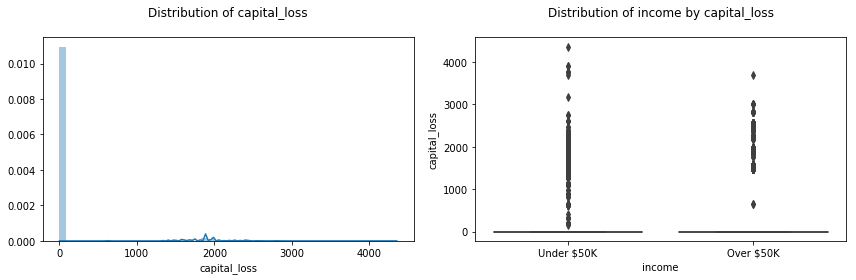

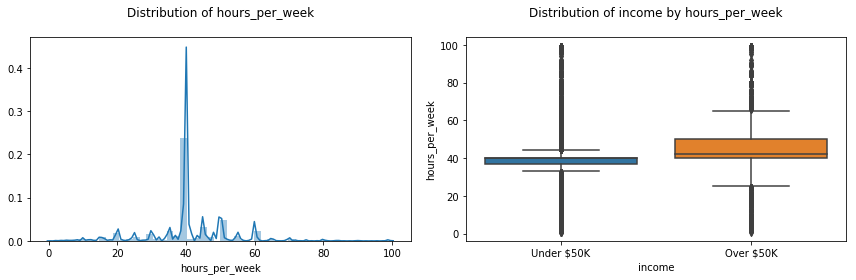

,Feature,P_value
0,age,0.000000e+00
1,capital_gain,0.000000e+00
3,hours_per_week,0.000000e+00
2,capital_loss,2.783591e-203


In [52]:
# Initializing data frame to hold p-values from Chi-Square test
ttest_p_vals_df = pd.DataFrame(columns=['Feature', 'P_value'])

for cnt_cols in ['age', 'capital_gain', 'capital_loss', 'hours_per_week']:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title('Distribution of {}\n'.format(cnt_cols))
    sns.distplot(df[cnt_cols])
    plt.subplot(122)
    plt.title('Distribution of income by {}\n'.format(cnt_cols))
    ax = sns.boxplot(data = df, x= 'income' , y = cnt_cols)
    ax.set_xticklabels(['Under $50K', 'Over $50K'])
    plt.tight_layout()
    plt.show()
    
    t_val, p_val = stats.ttest_ind(df[df.income == 0][cnt_cols] , df[df.income == 1][cnt_cols])
    ttest_p_vals_df = ttest_p_vals_df.append({'Feature':cnt_cols, 'P_value':float(p_val)}, ignore_index=True)

# Printing p-values of T tests, sorted by p-values
ttest_p_vals_df.sort_values('P_value')

As per the p_values obtained from ttest, 
all of the continuous variables have significant differences (p-value < 0.05) between populations earning over \$50K and under \$50K incomes.

From the histograms we can conclude that :

    Age is slightly right skewed with a tail contining older people in the population. 
    This may be because the dataset did not include people younger than 16 years .
    
    Capital gains and capital losses are also skewed right.
    This may be because many people did not report these figures.
    
    Hours per week is centered around 40. The majority of people worked around 40 hours per week
    
From the boxplots we can conclude that:

    Older people are more likely to earn more than \$50K
    Most people had zero capital gains and capital losses
    Majority of People who worked over 40 hours per week earned more than \$50K

fnlwgt: final weight column is the number of people the census believes the entry represents. This column is not useful for our modelling. So we can drop it.

In [14]:
df.drop('fnlwgt', axis = 1, inplace = True)

In [71]:
df.head()

,age,workclass,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,Government,Bachelors_Degree,Never_married,Adm-clerical,White,Male,2174,0,40,United-States,0
1,50,Self_employed,Bachelors_Degree,Married_living_with_spouse,Exec-managerial,White,Male,0,0,13,United-States,0
2,38,Private,High_School,Married_living_alone,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,53,Private,High_School,Married_living_with_spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,0
5,37,Private,Advanced_Degree,Married_living_with_spouse,Exec-managerial,White,Female,0,0,40,United-States,0


# Feature Engineering

In [19]:
features = df

In [20]:
features.head()

,age,workclass,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,Government,Bachelors_Degree,Never_married,Adm-clerical,White,Male,2174,0,40,United-States,0
1,50,Self_employed,Bachelors_Degree,Married_living_with_spouse,Exec-managerial,White,Male,0,0,13,United-States,0
2,38,Private,High_School,Married_living_alone,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,53,Private,High_School,Married_living_with_spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,0
5,37,Private,Advanced_Degree,Married_living_with_spouse,Exec-managerial,White,Female,0,0,40,United-States,0


In [21]:
workclass_dummies = pd.get_dummies(features.workclass, prefix = 'work')
features = pd.concat([features,workclass_dummies], axis = 1)
features.drop('workclass', axis = 1, inplace = True)

In [23]:
education_dummies = pd.get_dummies(features.education, prefix = 'edu')
features = pd.concat([features,education_dummies], axis = 1)
features.drop('education', axis = 1, inplace = True)

In [24]:
marital_status_dummies = pd.get_dummies(features.marital_status)
features = pd.concat([features,marital_status_dummies], axis = 1)
features.drop('marital_status', axis = 1, inplace = True)

In [25]:
occupation_dummies = pd.get_dummies(features.occupation, prefix = 'Occup')
features = pd.concat([features,occupation_dummies], axis = 1)
features.drop('occupation', axis = 1, inplace = True)

In [26]:
race_dummies = pd.get_dummies(features.race)
features = pd.concat([features,race_dummies], axis = 1)
features.drop('race', axis = 1, inplace = True)

In [27]:
sex_dummies = pd.get_dummies(features.sex)
features = pd.concat([features,sex_dummies], axis = 1)
features.drop('sex', axis = 1, inplace = True)

In [28]:
features['native_country'] = 1

In [29]:
features.head()

,age,capital_gain,capital_loss,hours_per_week,native_country,income,work_Government,work_Private,work_Self_employed,work_Without-pay,...,Occup_Sales,Occup_Tech-support,Occup_Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,39,2174,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,0,0,13,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,38,0,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,0,0,40,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,37,0,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


As we have seen before, the age column does not follow normal distribution. We need to do some transformation for these columns.

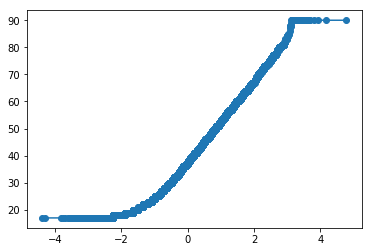

In [124]:
norm = np.random.normal(0,1,features.shape[0])
norm.sort()
plt.plot(norm , sorted(features.age), marker = 'o')
plt.show()

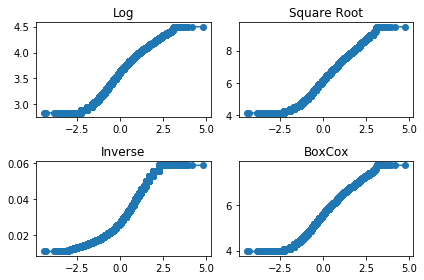

In [125]:
X_age = pd.DataFrame()
X_age['age_log'] = np.log(features.age)
X_age['age_sqrt'] = np.sqrt(features.age)
X_age['age_inv'] = 1 / features.age

from scipy.stats import boxcox
bc = boxcox(features.age)

X_age['age_bc'] = bc[0]

plt.subplot(221)
plt.title('Log')
plt.plot(norm , sorted(X_age['age_log']), marker = 'o')
plt.subplot(222)
plt.title('Square Root')
plt.plot(norm , sorted(X_age['age_sqrt']), marker = 'o')
plt.subplot(223)
plt.title('Inverse')
plt.plot(norm , sorted(X_age['age_inv']), marker = 'o')
plt.subplot(224)
plt.title('BoxCox')
plt.plot(norm , sorted(X_age['age_bc']), marker = 'o')
plt.tight_layout()
plt.show()

From the above figures, the square root transformation likely follows normal distribution.

In [30]:
features['age_sqrt'] = np.sqrt(features.age)
features.drop('age',axis=1, inplace=True)

From capital_gain and capital_loss calculate the net gain

In [31]:
features['net_capital_gain'] = features.capital_gain - features.capital_loss

In [129]:
features['net_capital_gain'].describe()

count    41292.000000
mean      1036.693597
std       7626.476929
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: net_capital_gain, dtype: float64

In [32]:
custom_buckets = [-5000, -1, 0, 5000, 10000]
features['net_capital_gain_cat'] = pd.cut(features.net_capital_gain, custom_buckets, 
                                       labels=['Loss','No_loss_gain','Gain', 'High Gain'])
features.net_capital_gain_cat.value_counts()

No_loss_gain    35777
Loss             1989
Gain             1333
High Gain        1182
Name: net_capital_gain_cat, dtype: int64

In [33]:
cap_dummies = pd.get_dummies(features['net_capital_gain_cat'], prefix='Capital')
features = pd.concat([features,cap_dummies ], axis = 1)
features.drop(['net_capital_gain_cat','capital_gain', 'capital_loss','net_capital_gain'], axis= 1, inplace=True)

In [34]:
features.head()

,hours_per_week,native_country,income,work_Government,work_Private,work_Self_employed,work_Without-pay,edu_Advanced_Degree,edu_Bachelors_Degree,edu_High_School,...,Black,Other,White,Female,Male,age_sqrt,Capital_Loss,Capital_No_loss_gain,Capital_Gain,Capital_High Gain
0,40,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,6.244998,0,0,1,0
1,13,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,7.071068,0,1,0,0
2,40,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,6.164414,0,1,0,0
3,40,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,7.280110,0,1,0,0
5,40,1,0,0,1,0,0,1,0,0,...,0,0,1,1,0,6.082763,0,1,0,0


Let's visualize the correlation between the features

In [35]:
x = features.loc[:,~features.columns.isin(['income','native_country'])]

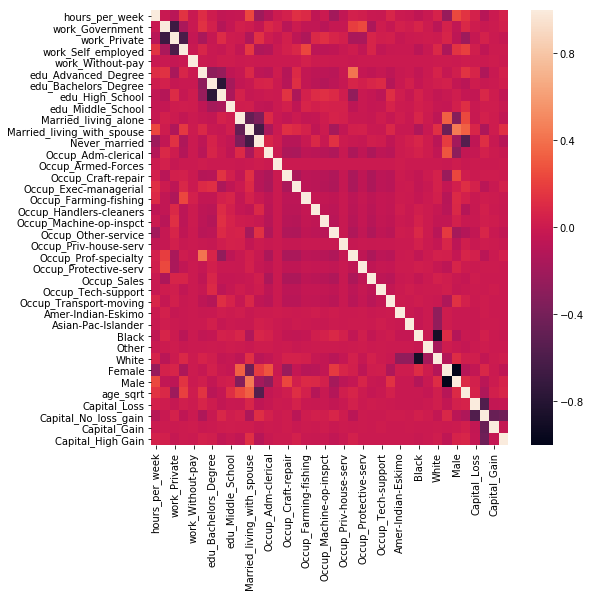

In [36]:
plt.figure(figsize = (8,8))
sns.heatmap(x.corr())
plt.show()

The correlation matrix looks fine.

# Modelling

In [85]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
features.income.value_counts()

0    30844
1    10448
Name: income, dtype: int64

In [39]:
# Separate majority and minority classes
features_majority = features[features.income==0]
features_minority = features[features.income==1]

In [40]:
# Downsample majority class# Downs 
features_majority_downsampled = resample(features_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(features_minority))    # to match minority class
                                
# Combine minority class with downsampled majority class
features_downsampled = pd.concat([features_majority_downsampled, features_minority])
 
# Display new class counts
features_downsampled.income.value_counts()

1    10448
0    10448
Name: income, dtype: int64

In [41]:
# Identify variables
X = features_downsampled.drop('income', axis=1)
y = features_downsampled.income

In [42]:
y.value_counts()

1    10448
0    10448
Name: income, dtype: int64

In [43]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(15672, 39)
(5224, 39)


In [44]:
print(y_train.value_counts())
print(y_test.value_counts())

1    7880
0    7792
Name: income, dtype: int64
0    2656
1    2568
Name: income, dtype: int64


Let's start with simple model - Bernoulli Naive Bayes.

In [58]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
# Calculating and reporting scores from cross validation to +/- 2 standard deviations from the mean
bnb_train_score = cross_val_score(bnb, X_train, y_train, cv = 5)
bnb_test_score = cross_val_score(bnb, X_test, y_test, cv = 5)
bnb_ROC_score = cross_val_score(bnb, X_test, y_test, cv = 5, scoring='roc_auc')
print('BernoulliNB')
print('Training set - Cross Validation Accuracy : {:.3f}(+/-{:.2f}) '.format(bnb_train_score.mean(),bnb_train_score.std()*2 ))
print('Test set - Cross Validation Accuracy :{:.3f} (+/-{:.2f}) '.format(bnb_test_score.mean(),bnb_test_score.std()*2))
print('ROC AUC Score :{:.3f} (+/-{:.2f}) '.format(bnb_ROC_score.mean(),bnb_ROC_score.std()*2))

BernoulliNB
Training set - Cross Validation Accuracy : 0.782(+/-0.01) 
Test set - Cross Validation Accuracy :0.780 (+/-0.02) 
ROC AUC Score :0.865 (+/-0.02) 


Our first Model was able to explain 78 % variance of the test set with a small range of two standard deviations from the mean. The ROC score was 86%. 

Let's try another model - Logistic Regression.

In [60]:
logr = LogisticRegression(random_state = 1)
logr.fit(X_train, y_train)
logr_train_score = cross_val_score(logr, X_train, y_train, cv = 5)
logr_test_score = cross_val_score(logr, X_test, y_test, cv =5)
logr_ROC_score = cross_val_score(logr, X_test, y_test, cv =5, scoring = 'roc_auc')

print('Logistic Regression')
print('Training set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(logr_train_score.mean(),logr_train_score.std()*2 ))
print('Test set - Cross Validation Score: {:.3f} (+/-{:.2f})'.format(logr_test_score.mean(), logr_test_score.std()*2))
print('ROC AUC Score: {:.3f} (+/-{:.2f})'.format(logr_ROC_score.mean(), logr_ROC_score.std()*2))

Logistic Regression
Training set- Cross Validation Score : 0.817 (+/-0.01)
Test set - Cross Validation Score: 0.805 (+/-0.02)
ROC AUC Score: 0.892 (+/-0.01)


The default Logistic Regression Model was able to explain 80 % variance of the test set with a small range of two standard deviations from the mean, which means that the scores from the 5 folds of cross validation are all close together.
The ROC score was 89% which was also better than the first model.

Let's see if we can improve the accuracy of the model through optimizing the parameters by using Grid Search with cross validation. We will optimize the regularization parameter C; the solver, which is the algorithm used in the optimization;, and the penalty, as L1 (LASSO) or L2 (Ridge) regression.

In [62]:
parameters =[ {'C': [0.01, 0.1, 1, 10, 100],'solver':['liblinear'],'penalty':['l1', 'l2'],'fit_intercept':[True]},
            {'C': [0.01, 0.1, 1, 10, 100],'solver':['lbfgs','newton-cg'],'fit_intercept':[True]}
            ]

gr_logr = GridSearchCV(logr,param_grid = parameters , scoring='roc_auc' )
gr_logr.fit(X_train,y_train)
print('Best Parameter ', gr_logr.best_params_)

Best Parameter  {'C': 10, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}


Using these best parameters, let's fit another logistic regression model to see it's performance.

In [63]:
logr = LogisticRegression(**gr_logr.best_params_, random_state = 1)
logr.fit(X_train, y_train)
logr_train_score = cross_val_score(logr, X_train, y_train, cv = 5)
logr_test_score = cross_val_score(logr, X_test, y_test, cv =5)
logr_ROC_score = cross_val_score(logr, X_test, y_test, cv =5, scoring = 'roc_auc')
print('Logistic Regression')
print('Training set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(logr_train_score.mean(),logr_train_score.std()*2 ))
print('Test set - Cross Validation Score: {:.3f} (+/-{:.2f})'.format(logr_test_score.mean(), logr_test_score.std()*2))
print('ROC AUC Score: {:.3f} (+/-{:.2f})'.format(logr_ROC_score.mean(), logr_ROC_score.std()*2))

Logistic Regression
Training set- Cross Validation Score : 0.816 (+/-0.01)
Test set - Cross Validation Score: 0.807 (+/-0.02)
ROC AUC Score: 0.893 (+/-0.02)


This best score is approximately the same as the accuracy score from the default logistic regression model. 
Let's take a look at the coefficients and intercept values to see what impacts the different demographic indicators have on income. The logistic regression coefficients represent the log of the odds that the change in the feature makes. To better interpret these values, we need to take the exponentiated value of the coefficients to get the odds ratios of each piece of demographic data.

In [197]:
print(np.exp(logr.intercept_))
print(np.exp(logr.coef_))

[ 1.]
[[  1.03396602e+00   1.00000000e+00   1.00000000e+00   1.06960832e+00
    7.95299616e-01   6.78794210e-01   4.91913928e+00   2.20286382e+00
    1.04461412e+00   3.25123059e-01   3.87731579e-01   3.98487394e+00
    2.66048256e-01   1.19433858e+00   1.00000000e+00   1.00000000e+00
    2.73624508e+00   3.01509887e-01   4.11009828e-01   6.94444661e-01
    4.23468565e-01   6.31452684e-01   2.40350118e+00   1.56950352e+00
    1.34866211e+00   1.88773120e+00   8.26011062e-01   7.94204604e-01
    1.53135161e+00   9.97805224e-01   1.00000000e+00   1.14942379e+00
    7.74847887e-01   1.00000000e+00   1.48756464e+00   1.17730909e-02
    3.78881840e-03   1.19090941e-02]]


In [51]:
logr_coef_df = pd.DataFrame()
logr_coef_df['Feature'] = X_train.columns
logr_coef_df['Coefficient'] = np.exp(logr.coef_).T

logr_coef_df.sort_values(by='Coefficient', ascending=False).head(10)

,Feature,Coefficient
6,edu_Advanced_Degree,4.781810
11,Married_living_with_spouse,4.422521
16,Occup_Exec-managerial,2.678351
22,Occup_Prof-specialty,2.375223
25,Occup_Tech-support,2.121329
7,edu_Bachelors_Degree,2.001373
23,Occup_Protective-serv,1.743996
34,age_sqrt,1.517303
24,Occup_Sales,1.504022
28,Asian-Pac-Islander,1.452257


Having Advanced Degree gives a 5 times higher odds for higher earnings whereas having a bachelor degree gives 2 times higher odds.
Married and living with spouse gives a 4 times higher odds for higher earnings 

# K Nearest Neighbors Classifier
Now that we have identified how some of the features impact a person's odds of earning over \$50K in a year, let's use another Model: K Nearest Neighbors Classifier model. This model classifies data points based on their similarity to other data points.

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_score = cross_val_score(knn, X_train, y_train, cv = 5)
knn_test_score = cross_val_score(knn, X_test, y_test, cv = 5)
knn_roc_score = cross_val_score(knn, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(knn_train_score.mean(), knn_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(knn_test_score.mean(), knn_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(knn_roc_score.mean(), knn_roc_score.std()*2))

Training Set- Cross Validation Score : 0.785 (+/-0.01)
Test Set- Cross Validation Score : 0.774 (+/-0.01)
ROC Score : 0.840 (+/-0.02)


The accuracy for this model is not as good as the logistic regression model. This may be because of the default values of the K: number of neighbors to consider. Let's optimize this parameter.

In [65]:
k = np.arange(2,20,1)
parameters = {'n_neighbors' : k}
gs_knn = GridSearchCV(knn, param_grid = parameters, scoring='roc_auc' )
gs_knn.fit(X_train, y_train)
print('Best parameters : ', gs_knn.best_params_)

Best parameters :  {'n_neighbors': 19}


let's use these parameters for a new KNN model and see the scores.

In [67]:
knn = KNeighborsClassifier(**gs_knn.best_params_)
knn.fit(X_train, y_train)
knn_train_score = cross_val_score(knn, X_train, y_train, cv = 5)
knn_test_score = cross_val_score(knn, X_test, y_test, cv = 5)
knn_ROC_score = cross_val_score(knn, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(knn_train_score.mean(), knn_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(knn_test_score.mean(), knn_test_score.std()*2))
print('ROC AUC Score : {:.3f} (+/-{:.2f})'.format(knn_ROC_score.mean(), knn_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.794 (+/-0.01)
Test Set- Cross Validation Score : 0.774 (+/-0.01)
ROC AUC Score : 0.861 (+/-0.02)


These accuracy scores are not as high as those for the logistic regression models. Let's try a different model.

# Random Forest Classifier
Let's use random forest classifier model. This model creates a set of decision trees , makes a prediction
for every tree in the forest. The probabilities predicted by all the trees are averaged, and the class with the
highest label is predicted.

In [68]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)
rfc_train_score = cross_val_score(rfc, X_train, y_train, cv = 5)
rfc_test_score = cross_val_score(rfc, X_test, y_test, cv = 5)
rfc_ROC_score = cross_val_score(rfc, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(rfc_train_score.mean(), rfc_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(rfc_test_score.mean(), rfc_test_score.std()*2))
print('ROC AUC Score : {:.3f} (+/-{:.2f})'.format(rfc_ROC_score.mean(), rfc_ROC_score.std()*2))


Training Set- Cross Validation Score : 0.782 (+/-0.02)
Test Set- Cross Validation Score : 0.772 (+/-0.02)
ROC AUC Score : 0.851 (+/-0.02)


With the default settings of the Random Forest model, the accuracy on the test set was 76% which is less than what we got from Logistic Regression. Let's try to optimize this model.

In [73]:
rfc_params  = {
    'n_estimators':[100,200,500],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[4, 6,7, 8, None],
    'min_samples_split':[2, 8]
}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=rfc_params, cv=5, scoring = 'roc_auc')
rfc_grid.fit(X_train, y_train)

print(rfc_grid.best_score_)
print(rfc_grid.best_params_)

0.89858895213
{'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}


let's use these parameters for a new Random Forest model and see the scores.

In [74]:
rfc = RandomForestClassifier( **rfc_grid.best_params_, random_state = 1)
rfc.fit(X_train, y_train)
rfc_train_score = cross_val_score(rfc, X_train, y_train, cv = 5)
rfc_test_score = cross_val_score(rfc, X_test, y_test, cv = 5)
rfc_ROC_score = cross_val_score(rfc, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(rfc_train_score.mean(), rfc_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(rfc_test_score.mean(), rfc_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(rfc_ROC_score.mean(), rfc_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.811 (+/-0.01)
Test Set- Cross Validation Score : 0.803 (+/-0.01)
ROC Score : 0.890 (+/-0.01)


Again, this didn't do a good job as Logistic Regression. Let's Try another model

# Gradient Boosted Regression Trees

In [75]:

gbrt = GradientBoostingClassifier(random_state=1)
gbrt.fit(X_train, y_train)
gbrt_train_score = cross_val_score(gbrt, X_train, y_train, cv = 5)
gbrt_test_score = cross_val_score(gbrt, X_test, y_test, cv = 5)
gbrt_ROC_score = cross_val_score(gbrt, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_train_score.mean(), gbrt_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_test_score.mean(), gbrt_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(gbrt_ROC_score.mean(), gbrt_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.824 (+/-0.01)
Test Set- Cross Validation Score : 0.817 (+/-0.01)
ROC Score : 0.898 (+/-0.01)


With the default settings of the Gradient Boosting Classifier model, the accuracy on the test set was 81.7 %. This is higher than the optimized logistic regression models. Now, let's try to optimize this model.

In [76]:
gbrt = GradientBoostingClassifier( learning_rate=0.1, n_estimators=110,max_depth=7, min_samples_split=800, 
                                         min_samples_leaf=50, subsample= 0.9, random_state=1, max_features=11 
                                  )
gbrt.fit(X_train, y_train)
gbrt_train_score = cross_val_score(gbrt, X_train, y_train, cv = 5)
gbrt_test_score = cross_val_score(gbrt, X_test, y_test, cv = 5)
gbrt_ROC_score = cross_val_score(gbrt, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_train_score.mean(), gbrt_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_test_score.mean(), gbrt_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(gbrt_ROC_score.mean(), gbrt_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.826 (+/-0.01)
Test Set- Cross Validation Score : 0.817 (+/-0.02)
ROC Score : 0.899 (+/-0.01)


Let's try with different values .

In [78]:
gbrt = GradientBoostingClassifier( learning_rate=0.025, n_estimators=440,max_depth=5, min_samples_split=800, 
                                         min_samples_leaf=60, subsample= 0.85, random_state=1, max_features=15 
                                  )
gbrt.fit(X_train, y_train)
gbrt_train_score = cross_val_score(gbrt, X_train, y_train, cv = 5)
gbrt_test_score = cross_val_score(gbrt, X_test, y_test, cv = 5)
gbrt_ROC_score = cross_val_score(gbrt, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_train_score.mean(), gbrt_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_test_score.mean(), gbrt_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(gbrt_ROC_score.mean(), gbrt_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.824 (+/-0.01)
Test Set- Cross Validation Score : 0.819 (+/-0.01)
ROC Score : 0.899 (+/-0.01)


The test score increased a bit while training score and ROC score remained same. 
Let's try lowering the learning rate and proportionally increasing the number of trees.

In [79]:
gbrt = GradientBoostingClassifier( learning_rate=0.01, n_estimators=1000,max_depth=5, min_samples_split=800, 
                                         min_samples_leaf=60, subsample= 0.85, random_state=1, max_features=15 
                                  )
gbrt.fit(X_train, y_train)
gbrt_train_score = cross_val_score(gbrt, X_train, y_train, cv = 5)
gbrt_test_score = cross_val_score(gbrt, X_test, y_test, cv = 5)
gbrt_ROC_score = cross_val_score(gbrt, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_train_score.mean(), gbrt_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_test_score.mean(), gbrt_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(gbrt_ROC_score.mean(), gbrt_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.824 (+/-0.01)
Test Set- Cross Validation Score : 0.820 (+/-0.01)
ROC Score : 0.899 (+/-0.01)


In [80]:
gbrt = GradientBoostingClassifier( learning_rate=0.005, n_estimators=2000,max_depth=5, min_samples_split=800, 
                                         min_samples_leaf=60, subsample= 0.85, random_state=1, max_features=15 
                                  )
gbrt.fit(X_train, y_train)
gbrt_train_score = cross_val_score(gbrt, X_train, y_train, cv = 5)
gbrt_test_score = cross_val_score(gbrt, X_test, y_test, cv = 5)
gbrt_ROC_score = cross_val_score(gbrt, X_test, y_test, cv = 5, scoring = 'roc_auc')
print('Training Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_train_score.mean(), gbrt_train_score.std()*2))
print('Test Set- Cross Validation Score : {:.3f} (+/-{:.2f})'.format(gbrt_test_score.mean(), gbrt_test_score.std()*2))
print('ROC Score : {:.3f} (+/-{:.2f})'.format(gbrt_ROC_score.mean(), gbrt_ROC_score.std()*2))

Training Set- Cross Validation Score : 0.825 (+/-0.01)
Test Set- Cross Validation Score : 0.821 (+/-0.01)
ROC Score : 0.899 (+/-0.01)


The accuracy was improved a little for test data.

Let's compare all the models now

# Model Analysis

In [81]:
score_list = [
    ['Bernoulli NB', bnb_train_score.mean(), bnb_test_score.mean(), bnb_ROC_score.mean()],
    ['Logistic_Regression', logr_train_score.mean(), logr_test_score.mean(), logr_ROC_score.mean()],
    ['KNN', knn_train_score.mean(), knn_test_score.mean(), knn_ROC_score.mean()],
    ['Random_Forest', rfc_train_score.mean(), rfc_test_score.mean(), rfc_ROC_score.mean()],
    ['Gradient_Boost', gbrt_train_score.mean(), gbrt_test_score.mean(), gbrt_ROC_score.mean()]
]

scores_df = pd.DataFrame(score_list, columns=['Model','Training Data Accuracy','Test Data Accuracy', 'ROC AUC Score'])
scores_df.sort_values('ROC AUC Score', ascending=False)

,Model,Training Data Accuracy,Test Data Accuracy,ROC AUC Score
4,Gradient_Boost,0.825103,0.821019,0.899372
1,Logistic_Regression,0.816425,0.807237,0.893154
3,Random_Forest,0.811256,0.803025,0.890410
0,Bernoulli NB,0.782351,0.780057,0.864660
2,KNN,0.794346,0.773546,0.860583


The gradient boosting classifier performed better than others in predicting the income class with 82% accuracy and a ROC AUC score of 0.899. The Logistic Regression did farely well with accuracy of 80% and ROC AUC Score of 0.893

Let's Analyse other metrics like precision, recall, F1 score and the confusion matrix for the best model which is Gradient Boosting model 

             precision    recall  f1-score   support

 Under $50K       0.85      0.79      0.82      2656
  Over $50K       0.80      0.86      0.82      2568

avg / total       0.82      0.82      0.82      5224

[[2090  566]
 [ 370 2198]]


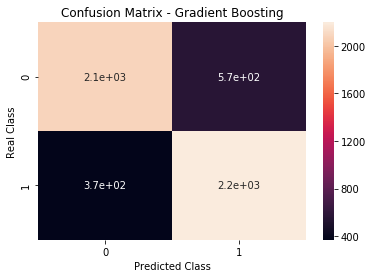

In [90]:
y_pred = gbrt.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Under $50K', 'Over $50K']))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

Precision : 

Percentage of positive outcomes that are correctly predicted, was 85% for people with income under \$50K and 80% for people with income over \$50K, This can be because of the small class imbalance in the test data set.

Recall: 

Percentage of actual positives that are correctly identified, was 79% for people with income under \$50K and 86% for people with income over \$50K. This means that the model was better able to distinguish actual positives for the higher income class.

The F1-score : 

weighted average balance between precision and recall. Overall, the model was able to identify both classes with 82% accuracy.

Let's find the important features that are indicative of higher or lower income levels.

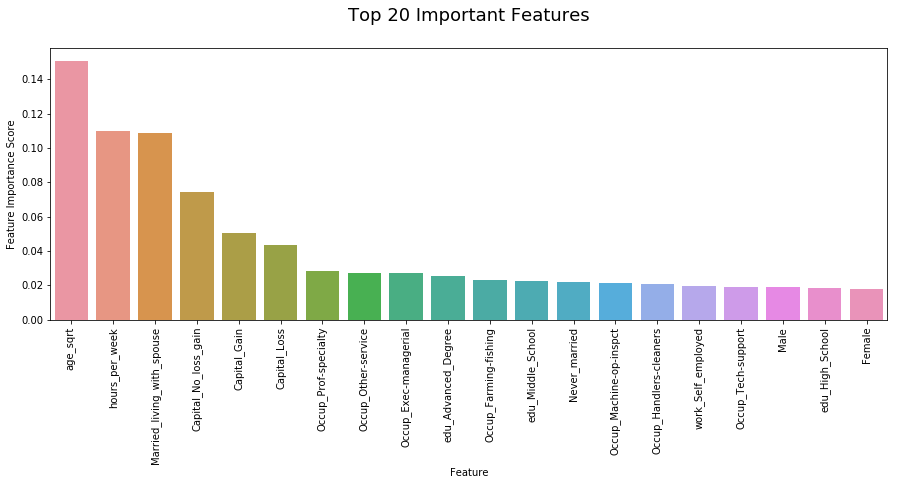

In [103]:
imp_feat_df = pd.DataFrame()
imp_feat_df['Feature'] = X_train.columns
imp_feat_df['importance'] = gbrt.feature_importances_
top_20_features = imp_feat_df.sort_values(by = 'importance', ascending = False ).head(20)
plt.figure(figsize=(15,5))

sns.barplot(data = top_20_features, x = 'Feature', y ='importance' )
plt.title('Top 20 Important Features\n', fontsize=18)
plt.ylabel('Feature Importance Score')
plt.xticks(rotation=90)
plt.show()

According to the gradient boosting classifier model, the "age of the person", "hours per week", and "Married and living with spouse" were the three most important demograpic features to predict if a person's income is over \$50,000.



# Conclusion

For this capstone project, I wanted to predict if a person's income is over or under \$50,000 in a year based on their demographic information. I used the features like age, the number of hours worked per week, their net capital gains, level of education, marital status, occupation, sex, working class, race, and native country. I applied models like Bernoulli Naive Bayes, Logistic Regression, KNN, Decision Trees, Random Forest Classifier and Gradient Boosting classifier. 

The Gradient Boosting classifier performed best on this dataset followed by Logistic Regression. 
These two models had ROC AUC scores of 0.899372 and 0.893154 respectfully which are nearly equal. 
As per the Gradient Boosting classifier model the 3 most important features are age, number of hours worked per week,married and living with Spouse. 